<a href="https://colab.research.google.com/github/saloni-saluja/mental-health-in-tech/blob/main/mental-health-in-tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import csv
import io

from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.ensemble as ens
import sklearn.model_selection as ms
from sklearn.ensemble import AdaBoostClassifier
import sklearn.neural_network as nn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
file = files.upload()

Saving survey.csv to survey.csv


# **1. Data Analysis**

In [ ]:
df = pd.read_csv('survey.csv')
df.head(3)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27/08/14 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27/08/14 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27/08/14 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


In [ ]:
df.shape

(1259, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
df = df.drop(labels=["Timestamp","state", "no_employees", "comments"], axis=1)

In [ ]:
pd.options.display.max_rows = 200
df.isna().sum(axis = 0)

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [ ]:
df.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Female (trans)                                      2
Man                                                 2
Cis Male                                            2
ostensibly male, unsure what that really means      1
Mal                                                 1
woman                                               1
Neuter                      

In [ ]:
# Clean gender's and make them either Male, Female, Non-binary


df["Gender"].replace(
    [
        "Cis Male", "Cis Man", "M", "Mail", "Make", "Mal", "Male ","Male (CIS)",
        "Male-ish", "Man", "m", "cis male", "maile", "male", "msle","Malr",
    ],
    "Male", inplace=True,
)

df["Gender"].replace(
    [
        "Cis Female", "F", "Femake", "Female ", "Female (cis)", "Woman",
        "femail", "female", "woman", "cis-female/femme", "f",
    ],
    "Female", inplace=True,
)

df["Gender"].replace(
    [
        "A little about you", "Agender", "All", "Androgyne", "Enby",
        "non-binary", "Nah", "something kinda male?", "p",
        "ostensibly male, unsure what that really means", "Genderqueer",
        "queer/she/they", "Neuter", "Trans woman", "Trans-female", "queer",
        "fluid", "fluid", "male leaning androgynous", "Female (trans)",
        "Guy (-ish) ^_^",
    ],
    "Nonbinary", inplace=True,
)

df.Gender.value_counts()

Male         991
Female       247
Nonbinary     21
Name: Gender, dtype: int64

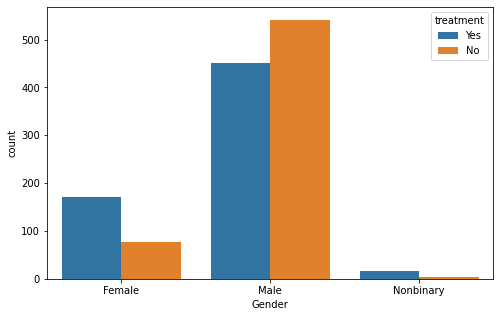

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'Gender', data = df, hue = 'treatment')
plt.show()

In [ ]:
print("Age", "\t", "Number of People")
df.Age.value_counts()

Age 	 Number of People


 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 54              3
 55              3
 47              2
 60              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1          

In [ ]:
df['Age'] = df['Age'].astype(int)

In [ ]:
print("Age Outliers \n")
for i in range(len(df['Age'])):
  if(df['Age'][i] < 14 or df['Age'][i] >100):
    print(df['Age'][i])

Age Outliers 

-29
329
99999999999
-1726
5
8
11
-1


In [ ]:
for i in range(len(df['Age'])):
  if(df['Age'][i] < 14 or df['Age'][i] >100):
    df.replace(to_replace=df['Age'][i], value = 29, inplace=True)

print("Age", "\t", "Number of People")
df.Age.value_counts()

Age 	 Number of People


29    93
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
46    12
45    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
54     3
57     3
47     2
60     2
61     1
62     1
65     1
58     1
53     1
72     1
Name: Age, dtype: int64

In [ ]:
df.self_employed.value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [ ]:
pd.options.display.max_rows = 200
df.isna().sum(axis = 0)

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [ ]:
"""
for i in range(len(df['self_employed'])):
  if(df['self_employed'][i] != "Yes" and df['self_employed'][i] != "No"):
    #print(df['self_employed'][i])
  #if(df['self_employed'][i] == "NA"):
    df.replace(to_replace=df['self_employed'][i], value = "Unknown", inplace=True)

print("Self-emp", " ", "Number of people")
df.self_employed.value_counts()
"""

'\nfor i in range(len(df[\'self_employed\'])):\n  if(df[\'self_employed\'][i] != "Yes" and df[\'self_employed\'][i] != "No"):\n    #print(df[\'self_employed\'][i])\n  #if(df[\'self_employed\'][i] == "NA"):\n    df.replace(to_replace=df[\'self_employed\'][i], value = "Unknown", inplace=True)\n\nprint("Self-emp", " ", "Number of people")\ndf.self_employed.value_counts()\n'

In [ ]:
df['self_employed'] = df['self_employed'].fillna(value="Don't know")

In [ ]:
pd.options.display.max_rows = 200
df.isna().sum(axis = 0)

Age                            0
Gender                         0
Country                        0
self_employed                  0
family_history                 0
treatment                      0
work_interfere               264
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [ ]:
df.work_interfere.value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [ ]:
pd.options.display.max_rows = 200
df.isna().sum(axis = 0)

Age                            0
Gender                         0
Country                        0
self_employed                  0
family_history                 0
treatment                      0
work_interfere               264
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [ ]:
df['work_interfere'] = df['work_interfere'].fillna(value="Don't know")

In [ ]:
pd.options.display.max_rows = 200
df.isna().sum(axis = 0)

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [ ]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,Don't know,No,Yes,Often,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,Don't know,No,No,Rarely,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,Don't know,No,No,Rarely,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Don't know,Yes,Yes,Often,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,Don't know,No,No,Never,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [ ]:
df.self_employed.value_counts()

No            1095
Yes            146
Don't know      18
Name: self_employed, dtype: int64

In [ ]:
df.family_history.value_counts()

No     767
Yes    492
Name: family_history, dtype: int64

In [ ]:
df.treatment.value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

In [ ]:
df.work_interfere.value_counts()

Sometimes     465
Don't know    264
Never         213
Rarely        173
Often         144
Name: work_interfere, dtype: int64

In [ ]:
df.leave.value_counts()

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

In [ ]:
df.Country.value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Poland                      7
Italy                       7
Sweden                      7
South Africa                6
Brazil                      6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Austria                     3
Finland                     3
Russia                      3
Portugal                    2
Greece                      2
Denmark                     2
Croatia                     2
Colombia                    2
Nigeria                     1
Latvia                      1
Georgia                     1
Hungary                     1
Spain     

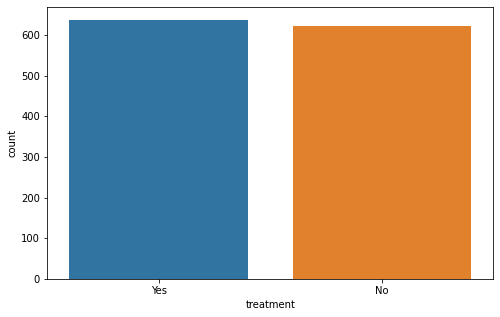

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'treatment', data = df)
plt.show()

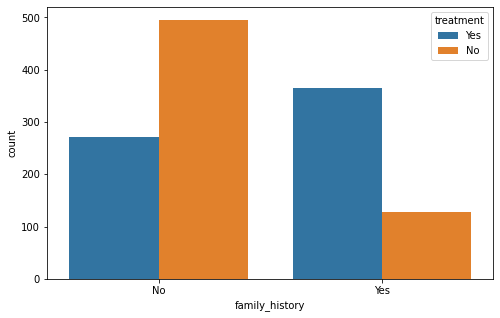

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'family_history', data = df, hue = 'treatment')
plt.show()

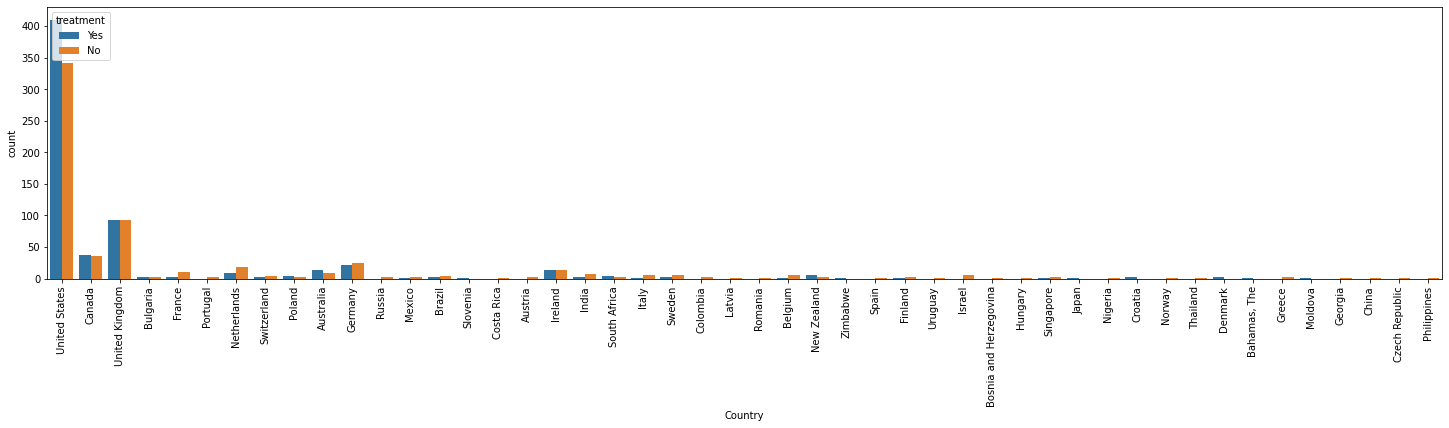

In [ ]:
plt.figure(figsize = (25,5))
sns.countplot(x = 'Country', data = df, hue = 'treatment')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.replace(to_replace=['Nonbinary'], value="0", inplace=True) # 0 = Non-binary
df.replace(to_replace=['Female'], value="1", inplace=True) # 1 = Female
df.replace(to_replace=['Male'], value="2", inplace=True) # 2 = Male

df.replace(to_replace=["Don't know"], value="0", inplace=True) # 0 = Unknown
df.replace(to_replace=["Not sure"], value="0", inplace=True) # 0 = Not sure
df.replace(to_replace=["Maybe"], value="0", inplace=True)
df.replace(to_replace=['Yes'], value="1", inplace=True) # 1 = Yes
df.replace(to_replace=['No'], value="2", inplace=True) # 2 = No

df.replace(to_replace=['Never'], value="1", inplace=True) # 1 = Never
df.replace(to_replace=['Rarely'], value="2", inplace=True) # 2 = Rarely
df.replace(to_replace=['Sometimes'], value="3", inplace=True) # 3 = Sometimes
df.replace(to_replace=['Often'], value="4", inplace=True) # 4 = Often

df.replace(to_replace=['Somewhat easy'], value="1", inplace=True)
df.replace(to_replace=['Very easy'], value="2", inplace=True)
df.replace(to_replace=['Somewhat difficult'], value="3", inplace=True)
df.replace(to_replace=['Very difficult'], value="4", inplace=True)

df.replace(to_replace=['Some of them'], value="3", inplace=True)

df.replace(to_replace=['United States'], value="1", inplace=True)
df.replace(to_replace=['Canada'], value="1", inplace=True)
df.replace(to_replace=['United Kingdom'], value="2", inplace=True)
df.replace(to_replace=['Germany'], value="2", inplace=True)
df.replace(to_replace=['Ireland'], value="2", inplace=True)
df.replace(to_replace=['Netherlands'], value="2", inplace=True)
df.replace(to_replace=['Australia'], value="2", inplace=True)
df.replace(to_replace=['France'], value="2", inplace=True)
df.replace(to_replace=['India'], value="2", inplace=True)
df.replace(to_replace=['New Zealand'], value="2", inplace=True)
df.replace(to_replace=['Switzerland'], value="2", inplace=True)
df.replace(to_replace=['Italy'], value="2", inplace=True)
df.replace(to_replace=['Sweden'], value="2", inplace=True)
df.replace(to_replace=['Poland'], value="2", inplace=True)
df.replace(to_replace=['Brazil'], value="2", inplace=True)
df.replace(to_replace=['Belgium'], value="2", inplace=True)
df.replace(to_replace=['South Africa'], value="2", inplace=True)
df.replace(to_replace=['Israel'], value="2", inplace=True)
df.replace(to_replace=['Bulgaria'], value="2", inplace=True)
df.replace(to_replace=['Singapore'], value="2", inplace=True)
df.replace(to_replace=['Finland'], value="2", inplace=True)
df.replace(to_replace=['Russia'], value="2", inplace=True)
df.replace(to_replace=['Mexico'], value="2", inplace=True)
df.replace(to_replace=['Austria'], value="2", inplace=True)
df.replace(to_replace=['Portugal'], value="2", inplace=True)
df.replace(to_replace=['Greece'], value="2", inplace=True)
df.replace(to_replace=['Colombia'], value="2", inplace=True)
df.replace(to_replace=['Croatia'], value="2", inplace=True)
df.replace(to_replace=['Denmark'], value="2", inplace=True)
df.replace(to_replace=['Zimbabwe'], value="2", inplace=True)
df.replace(to_replace=['Thailand'], value="2", inplace=True)
df.replace(to_replace=['Romania'], value="2", inplace=True)
df.replace(to_replace=['Japan'], value="2", inplace=True)
df.replace(to_replace=['Moldova'], value="2", inplace=True)
df.replace(to_replace=['Latvia'], value="2", inplace=True)
df.replace(to_replace=['Nigeria'], value="2", inplace=True)
df.replace(to_replace=['Philippines'], value="2", inplace=True)
df.replace(to_replace=['Georgia'], value="2", inplace=True)
df.replace(to_replace=['Spain'], value="2", inplace=True)
df.replace(to_replace=['China'], value="2", inplace=True)
df.replace(to_replace=['Uruguay'], value="2", inplace=True)
df.replace(to_replace=['Norway'], value="2", inplace=True)
df.replace(to_replace=['Costa Rica'], value="2", inplace=True)
df.replace(to_replace=['Bosnia and Herzegovina'], value="2", inplace=True)
df.replace(to_replace=['Bahamas, The'], value="2", inplace=True)
df.replace(to_replace=['Czech Republic'], value="2", inplace=True)
df.replace(to_replace=['Slovenia'], value="2", inplace=True)
df.replace(to_replace=['Hungary'], value="2", inplace=True)

In [ ]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,1,1,0,2,1,4,2,1,1,0,2,1,1,1,2,2,3,1,2,0,1,2
1,44,2,1,0,2,2,2,2,2,0,2,0,0,0,0,0,2,2,2,2,2,0,2
2,32,2,1,0,2,2,2,2,1,2,2,2,2,0,3,2,2,1,1,1,1,2,2
3,31,2,2,0,1,1,4,2,1,2,1,2,2,2,3,1,1,3,2,0,0,2,1
4,31,2,1,0,2,2,1,1,1,1,2,0,0,0,0,2,2,3,1,1,1,0,2


In [ ]:
df.shape

(1259, 23)

In [ ]:
df['Age'] = df['Age'].astype(int)
df['Gender'] = df['Gender'].astype(int)
df['Country'] = df['Country'].astype(int)
df['self_employed'] = df['self_employed'].astype(int)
df['family_history'] = df['family_history'].astype(int)
df['treatment'] = df['treatment'].astype(int)
df['work_interfere'] = df['work_interfere'].astype(int)
df['remote_work'] = df['remote_work'].astype(int)
df['tech_company'] = df['tech_company'].astype(int)
df['benefits'] = df['benefits'].astype(int)
df['care_options'] = df['care_options'].astype(int)
df['wellness_program'] = df['wellness_program'].astype(int)
df['seek_help'] = df['seek_help'].astype(int)
df['anonymity'] = df['anonymity'].astype(int)
df['leave'] = df['leave'].astype(int)
df['mental_health_consequence'] = df['mental_health_consequence'].astype(int)
df['phys_health_consequence'] = df['phys_health_consequence'].astype(int)
df['coworkers'] = df['coworkers'].astype(int)
df['supervisor'] = df['supervisor'].astype(int)
df['mental_health_interview'] = df['mental_health_interview'].astype(int)
df['phys_health_interview'] = df['phys_health_interview'].astype(int)
df['mental_vs_physical'] = df['mental_vs_physical'].astype(int)
df['obs_consequence'] = df['obs_consequence'].astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

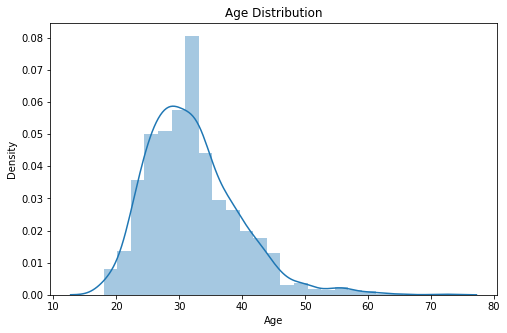

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(df["Age"], bins=25)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


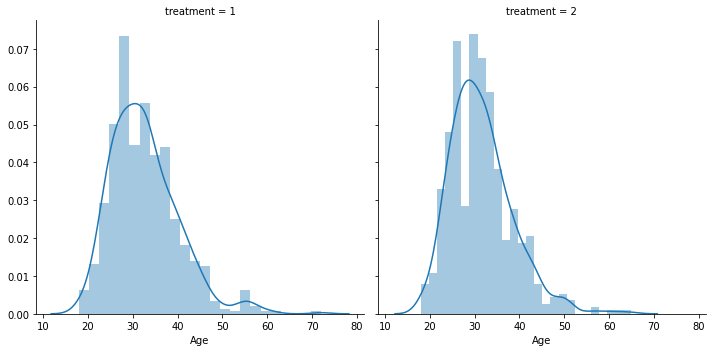

In [ ]:
g = sns.FacetGrid(df, col='treatment', size=5)
g.map(sns.distplot, "Age")

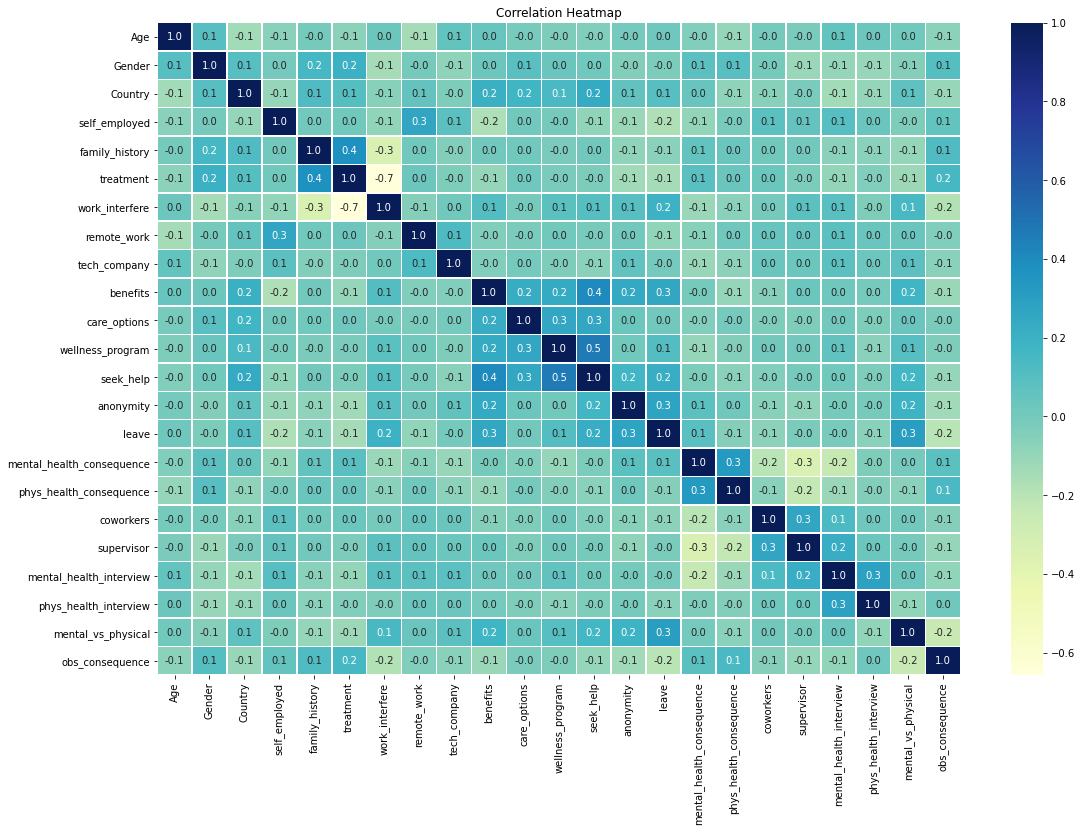

In [ ]:
plt.figure(figsize=(18, 12))
heatmap = sns.heatmap(df.corr(), annot = True, linewidths = .5, cmap = "YlGnBu", fmt = '.1f')
heatmap.set_title('Correlation Heatmap');

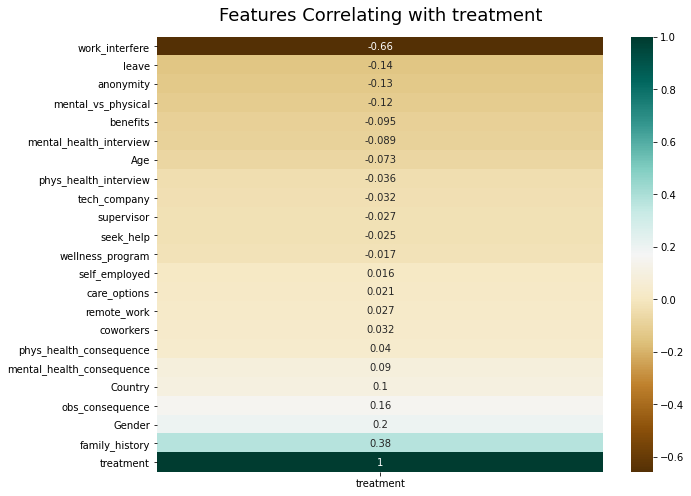

In [ ]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df.corr()[['treatment']].sort_values(by='treatment'), annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with treatment', fontdict={'fontsize':18}, pad=16);

# **4. Data Exploration**

## 1. Principle Component Analysis (PCA)

In [ ]:
inputs = ['family_history', 'Gender', 'obs_consequence', 'Country',
               'mental_health_consequence', 'phys_health_consequence', 
               'coworkers', 'remote_work', 'care_options', 'self_employed',
               'wellness_program', 'seek_help', 'supervisor', 'tech_company',
               'phys_health_interview', 'Age', 'mental_health_interview',
               'benefits', 'mental_vs_physical', 'anonymity', 'leave',
               'work_interfere']
output = 'treatment'

In [ ]:
X = df.loc[:, inputs].values
X.shape

(1259, 22)

In [ ]:
y = df.loc[:, output].values
y.shape

(1259,)

In [ ]:
standard_scaler = StandardScaler()
standard_scaler.fit(X)
X = standard_scaler.transform(X)

In [ ]:
pca = PCA(22)
pca.fit(X)
X = pca.transform(X)

print(pca.n_components_)

22


In [ ]:
#pca.components_

In [ ]:
pca.explained_variance_ratio_

array([0.11807342, 0.09919184, 0.07699536, 0.06146599, 0.0569651 ,
       0.05308412, 0.04957245, 0.04582174, 0.04090873, 0.03967245,
       0.03790837, 0.03551163, 0.03449257, 0.03340484, 0.03126147,
       0.03070045, 0.02814896, 0.02783411, 0.02720068, 0.02578082,
       0.02484354, 0.02116134])

11.8% variance in the data shown by the first component. Other components have very less effect on the variance...9.91% variance shown by the second component, 7.70% shown by the third one. So on and so forth. Since we do not have a component that is responsible for explaining a vast majority of the variance, we won't drop any field.

## 2. Classification Decision Trees

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
y

array([1, 2, 2, ..., 1, 2, 1])

In [ ]:
y_train

array([1, 1, 2, ..., 1, 2, 1])

In [ ]:
y_test

array([1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2])

In [ ]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7142857142857143


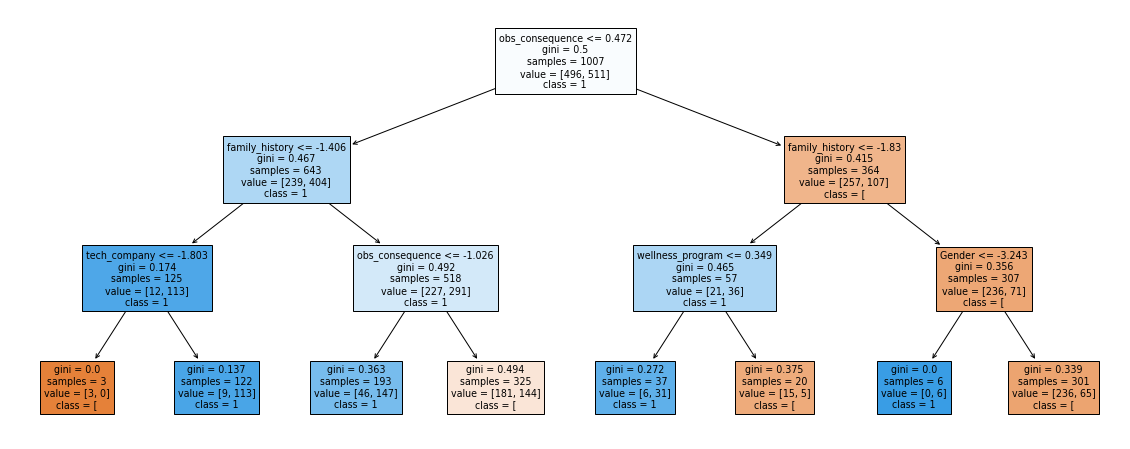

In [ ]:
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plt.figure(figsize=(20, 8))
var = tree.plot_tree(clf, feature_names=inputs, class_names=str(y),
                     filled = True, fontsize = 9.5)

# **5. Experimental Method**

# 1. Support Vector Classifier

In [ ]:
k = 10 
cv = RepeatedKFold(n_splits=k, n_repeats=5)
clf = SVC(kernel='linear')
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

Mean of the accuracy scores:  0.8296914285714285
Standard Deviation of the accuracy scores:  0.03802783616121296


In [ ]:
k = 10
cv = KFold(n_splits=k, shuffle=True)
clf = SVC(C = 10.0, kernel='linear')
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

Mean of the accuracy scores:  0.8300507936507937
Standard Deviation of the accuracy scores:  0.03816295621423113


In [ ]:
k = 10
cv = KFold(n_splits=k, shuffle=True)
clf = SVC(C = 5.0, kernel='linear')
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

Mean of the accuracy scores:  0.831631746031746
Standard Deviation of the accuracy scores:  0.021691082005025765


# 2. Classification Decision Trees

In [ ]:
cv = LeaveOneOut()
clf = DecisionTreeClassifier()
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv=cv, n_jobs=-1)

print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

Mean of the accuracy scores:  0.6640190627482129
Standard Deviation of the accuracy scores:  0.47233224223548176


In [ ]:
k = 7
cv = KFold(n_splits=k, shuffle=True)
clf = DecisionTreeClassifier(min_samples_split=20, random_state=99)
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv = cv)
print(f'Scores for each fold are: {scores}')
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

Scores for each fold are: [0.75555556 0.71666667 0.69444444 0.64444444 0.66666667 0.72222222
 0.61452514]
Mean of the accuracy scores:  0.6877893056664007
Standard Deviation of the accuracy scores:  0.04527481815006064


In [ ]:
k = 10
cv = RepeatedKFold(n_splits=k)
clf = DecisionTreeClassifier(min_samples_split=40, random_state=99)
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

Mean of the accuracy scores:  0.6925422222222224
Standard Deviation of the accuracy scores:  0.04290304647605083


# 3. Random Forest Classifier

In [ ]:
k = 13
cv = KFold(n_splits=k, shuffle=True)
clf = RandomForestClassifier(random_state=99)
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

Mean of the accuracy scores:  0.8188606925720328
Standard Deviation of the accuracy scores:  0.03934989517140384


In [ ]:
k = 10
cv = RepeatedKFold(n_splits=k)
clf = RandomForestClassifier(random_state=99)
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

Mean of the accuracy scores:  0.8015060317460319
Standard Deviation of the accuracy scores:  0.03240195282911722


In [ ]:
k = 13
cv = RepeatedKFold(n_splits=k)
clf = RandomForestClassifier(random_state=99)
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

Mean of the accuracy scores:  0.8026244052339413
Standard Deviation of the accuracy scores:  0.0368572124512674


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(random_state=99)
param_grid = { 
    'n_estimators': [200],
    'max_features': [10],
    'max_depth' : [10],
    'criterion' :['gini']
}
clf_gridSearch = GridSearchCV(estimator=clf, param_grid=param_grid, cv= cv)
clf_gridSearch.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=13, random_state=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                           

In [ ]:
k = 13
cv = RepeatedKFold(n_splits=k)
clf = RandomForestClassifier(n_estimators = 200, criterion='gini', max_features = 10,
                             max_depth = 10)
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

Mean of the accuracy scores:  0.7996819653713982
Standard Deviation of the accuracy scores:  0.03741306648344242


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(random_state=99)
param_grid = { 
    'n_estimators': [100],
    'max_features': [22],
    'max_depth' : [7,10],
    'criterion' :['gini','entropy']
}
clf_gridSearch = GridSearchCV(estimator=clf, param_grid=param_grid, cv= cv)
clf_gridSearch.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=13, random_state=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                           

In [ ]:
clf_gridSearch.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 22,
 'n_estimators': 100}

In [ ]:
k = 13
cv = RepeatedKFold(n_splits=k)
clf = RandomForestClassifier(n_estimators = 100, criterion='entropy', max_features = 22,
                             max_depth = 10, random_state = 99)
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

Mean of the accuracy scores:  0.7950147039386729
Standard Deviation of the accuracy scores:  0.041832983482957005


In [ ]:
k = 13
cv = RepeatedKFold(n_splits=k)
clf = RandomForestClassifier(n_estimators = 300, criterion='entropy', random_state = 99)
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

Mean of the accuracy scores:  0.8070694554586306
Standard Deviation of the accuracy scores:  0.036179967881644515


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(random_state=99)
param_grid = {
    'max_depth' : [10, 12],
    'n_estimators': [300, 500],
    'criterion' :['gini','entropy']
}
clf_gridSearch = GridSearchCV(estimator=clf, param_grid=param_grid, cv= cv)
clf_gridSearch.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=13, random_state=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                           

In [ ]:
clf_gridSearch.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 500}

In [ ]:
k = 13
cv = RepeatedKFold(n_splits=k)
clf = RandomForestClassifier(n_estimators = 500, criterion='entropy',
                             random_state = 99, max_depth=10)
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

Mean of the accuracy scores:  0.8097839016653449
Standard Deviation of the accuracy scores:  0.03500477080803105


In [ ]:
k = 13
cv = KFold(n_splits=k, shuffle=True)
clf = RandomForestClassifier(n_estimators = 600, criterion='entropy',
                             random_state = 99, max_depth=10)
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

Mean of the accuracy scores:  0.8101787602431934
Standard Deviation of the accuracy scores:  0.03554975102361522


#4. Adaboost

In [ ]:
k = 13
cv = RepeatedKFold(n_splits=k)
clf = AdaBoostClassifier()
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

Mean of the accuracy scores:  0.7803264604810997
Standard Deviation of the accuracy scores:  0.04155517472317026


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = AdaBoostClassifier()
param_grid = {
    'learning_rate': [0.1, 0.5, 0.2, 0.3]
}
clf_gridSearch = GridSearchCV(estimator=clf, param_grid=param_grid, cv= cv)
clf_gridSearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.5, 0.2, 0.3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf_gridSearch.best_params_

{'learning_rate': 0.3}

In [ ]:
k = 13
cv = RepeatedKFold(n_splits=k)
clf = AdaBoostClassifier(learning_rate=0.3)
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

Mean of the accuracy scores:  0.7889406555643669
Standard Deviation of the accuracy scores:  0.040130449035416266


# 5. Multi-Layer Perception (MLP)

In [ ]:
k = 13
cv = ms.StratifiedKFold()
clf = nn.MLPClassifier(hidden_layer_sizes=(16,16,4), activation='relu',
                       solver='adam', alpha=0.0001)
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Mean of the accuracy scores:  0.7918895845190667
Standard Deviation of the accuracy scores:  0.01630154231765449


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
cv = ms.StratifiedKFold()
clf = nn.MLPClassifier(solver='adam')
param_grid = {
    'hidden_layer_sizes': [(16, 16, 4), (20, 15, 10, 5), (20, 17, 13, 10, 8, 5),
                           (18, 15, 10, 7, 5)],
    'activation': ['relu', 'sigmoid'],
    'alpha' : [0.01, 0.02, 0.001, 0.00002, 0.0001]
}
clf_gridSearch = GridSearchCV(estimator=clf, param_grid=param_grid, cv= cv)
clf_gridSearch.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['relu', 'sigmoid'],
                         'alpha': [0.01, 0.

In [ ]:
clf_gridSearch.best_params_

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (16, 16, 4)}

In [ ]:
k = 13
cv = ms.StratifiedKFold()
clf = nn.MLPClassifier(hidden_layer_sizes=(16, 16, 4), activation='relu',
                       alpha=0.0001, solver='adam')
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Mean of the accuracy scores:  0.8172990577373047
Standard Deviation of the accuracy scores:  0.01547770653513789


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
k = 13
cv = ms.StratifiedKFold()
clf = nn.MLPClassifier(hidden_layer_sizes=(20, 15, 10, 5), activation='relu', alpha=0.01, solver='adam')
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Mean of the accuracy scores:  0.7926800733573642
Standard Deviation of the accuracy scores:  0.01831730206115904


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
k = 13
cv = ms.StratifiedKFold()
clf = nn.MLPClassifier(hidden_layer_sizes=(16, 16, 4), activation='relu', alpha=0.02, solver='adam')
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Mean of the accuracy scores:  0.7434737241510151
Standard Deviation of the accuracy scores:  0.12053831725442016


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
cv = ms.StratifiedKFold()
clf = nn.MLPClassifier(solver='adam')
param_grid = {
    'hidden_layer_sizes': [(16, 16, 4), (20, 15, 10, 5), (20, 17, 13, 10, 8, 5), (18, 15, 10, 7, 5)],
    'activation': ['relu', 'sigmoid'],
    'alpha' : [0.01, 0.02, 0.001, 0.00002, 0.0001],
    'learning_rate' : ['constant', 'adaptive']
}
clf_gridSearch = GridSearchCV(estimator=clf, param_grid=param_grid, cv= cv)
clf_gridSearch.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['relu', 'sigmoid'],
                         'alpha': [0.01, 0.02, 0.001, 2e-05, 0.0001],
                         'hidden_laye

In [ ]:
clf_gridSearch.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (20, 15, 10, 5),
 'learning_rate': 'adaptive'}

In [ ]:
k = 13
cv = ms.StratifiedKFold()
clf = nn.MLPClassifier(hidden_layer_sizes=(18, 15, 10, 7, 5), activation='relu', alpha=0.02, solver='adam', learning_rate='adaptive')
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Mean of the accuracy scores:  0.7894991462720548
Standard Deviation of the accuracy scores:  0.010700089618585337


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
models = ['KNN', 'SVC','Random Forest', 'Decision Trees', 'Bagging Classifier',
          'Random Forest Classifier', 'Ada Boost Classifier',
          'Gradient Boost Classifier']
clf = [KNeighborsClassifier(10),
       SVC(kernel='linear'),
       RandomForestClassifier(random_state=99),
       DecisionTreeClassifier(max_depth=4),
       ens.BaggingClassifier(),
       ens.RandomForestClassifier(),
       ens.AdaBoostClassifier(),
       ens.GradientBoostingClassifier()]
i=0;
while(i <= 6):
  for c in clf:
    c.fit(X_train, y_train)
    y_pred = c.predict(X_test)
    print(models[i], "accuracy: ", accuracy_score(y_test,y_pred))
    i += 1

KNN accuracy:  0.75
SVC accuracy:  0.8015873015873016
Random Forest accuracy:  0.7817460317460317
Decision Trees accuracy:  0.6746031746031746
Bagging Classifier accuracy:  0.7261904761904762
Random Forest Classifier accuracy:  0.7738095238095238
Ada Boost Classifier accuracy:  0.75
Gradient Boost Classifier accuracy:  0.7738095238095238


## Stratified K Fold

In [ ]:
models = ['KNN', 'SVC','Random Forest', 'Decision Trees', 'Bagging Classifier',
           'Ada Boost Classifier','Gradient Boost Classifier',
          'Multi-Layer Perceptron']
clf = [KNeighborsClassifier(10),
       SVC(kernel='linear'),
       RandomForestClassifier(random_state=99),
       DecisionTreeClassifier(min_samples_split=40, random_state=99),
       ens.BaggingClassifier(),
       ens.AdaBoostClassifier(learning_rate=0.3),
       ens.GradientBoostingClassifier(),
       nn.MLPClassifier(hidden_layer_sizes=(16, 16, 4), activation='relu',
                        solver = 'adam', alpha=0.0001)]
cv = ms.StratifiedKFold()

i = 0;
while(i<6):
  for c in clf:
    scores = ms.cross_val_score(c, X, y, cv=cv, n_jobs=-1)
    print(models[i], "Mean : ", np.mean(scores))
    i += 1

KNN Mean :  0.7751881363435148
SVC Mean :  0.8284038449377095
Random Forest Mean :  0.798222981091507
Decision Trees Mean :  0.6775121735281098
Bagging Classifier Mean :  0.760096123442737
Ada Boost Classifier Mean :  0.7934452665528363
Gradient Boost Classifier Mean :  0.7902833111996459
Multi-Layer Perceptron Mean :  0.7982324669575667


KFold

# Repeated KFold

In [ ]:
models = ['KNN', 'SVC','Random Forest', 'Decision Trees', 'Bagging Classifier',
           'Ada Boost Classifier','Gradient Boost Classifier',
          'Multi-Layer Perceptron']
clf = [KNeighborsClassifier(10),
       SVC(kernel='linear'),
       RandomForestClassifier(random_state=99),
       DecisionTreeClassifier(min_samples_split=40, random_state=99),
       ens.BaggingClassifier(),
       ens.AdaBoostClassifier(learning_rate=0.3),
       ens.GradientBoostingClassifier(),
       nn.MLPClassifier(hidden_layer_sizes=(16, 16, 4), activation='relu',
                        solver = 'adam', alpha=0.0001)]

k=13
cv = RepeatedKFold(n_splits=k)

i = 0;
while(i<6):
  for c in clf:
    scores = ms.cross_val_score(c, X, y, cv=cv, n_jobs=-1)
    print(models[i], "Mean : ", np.mean(scores))
    i += 1

KNN Mean :  0.777447627544277
SVC Mean :  0.8281076526566217
Random Forest Mean :  0.8061896973301611
Decision Trees Mean :  0.6868003238170765
Bagging Classifier Mean :  0.7617144131641553
Ada Boost Classifier Mean :  0.7937376090404441
Gradient Boost Classifier Mean :  0.7983189598202484
Multi-Layer Perceptron Mean :  0.7903870935765265


In [ ]:
models = ['KNN', 'SVC','Random Forest', 'Decision Trees', 'Bagging Classifier',
           'Ada Boost Classifier','Gradient Boost Classifier',
          'Multi-Layer Perceptron']
clf = [KNeighborsClassifier(10),
       SVC(C = 0.5, kernel='linear'),
       RandomForestClassifier(random_state=99),
       DecisionTreeClassifier(min_samples_split=40, random_state=99),
       ens.BaggingClassifier(),
       ens.AdaBoostClassifier(learning_rate=0.3),
       ens.GradientBoostingClassifier(),
       nn.MLPClassifier(hidden_layer_sizes=(16, 16, 4), activation='relu',
                        solver = 'adam', alpha=0.0001)]
cv = ms.StratifiedKFold()

i = 0;
while(i<6):
  for c in clf:
    scores = ms.cross_val_score(c, X, y, cv=cv, n_jobs=-1)
    print(models[i], "Mean : ", np.mean(scores))
    i += 1

KNN Mean :  0.7751881363435148
SVC Mean :  0.8284038449377095
Random Forest Mean :  0.798222981091507
Decision Trees Mean :  0.6775121735281098
Bagging Classifier Mean :  0.7545405678871815
Ada Boost Classifier Mean :  0.7934452665528363
Gradient Boost Classifier Mean :  0.7902801492442928
Multi-Layer Perceptron Mean :  0.8030101814962374


# **6. Results**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = SVC(C = 5.0, kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[123  10]
 [ 33  86]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.92      0.85       133
           2       0.90      0.72      0.80       119

    accuracy                           0.83       252
   macro avg       0.84      0.82      0.83       252
weighted avg       0.84      0.83      0.83       252



In [ ]:
cv = StratifiedKFold()
clf = SVC(C = 5.0, kernel='linear')
scores = cross_val_score(clf, X, y, cv = cv)
print("Mean of the accuracy scores: ", np.mean(scores))
print("Standard Deviation of the accuracy scores: ", np.std(scores))

Mean of the accuracy scores:  0.8268133813950547
Standard Deviation of the accuracy scores:  0.021714141283146075
